In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
df = pd.read_csv('Churn_Modelling.csv', index_col = 0)

In [71]:
df.isnull().values.any()

False

In [35]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Split dataset into Training set (80%) and Test (20%) set
Do this at the very initial step to avoid any accidental data leakage between the two.


In [38]:
X = new_df.loc[:,'CreditScore':'EstimatedSalary']
y = new_df['Exited']
print(X.head())
print(y.head())

           CreditScore Geography  Gender  Age  Tenure    Balance  \
RowNumber                                                          
1                  619    France  Female   42       2       0.00   
2                  608     Spain  Female   41       1   83807.86   
3                  502    France  Female   42       8  159660.80   
4                  699    France  Female   39       1       0.00   
5                  850     Spain  Female   43       2  125510.82   

           NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
RowNumber                                                             
1                      1          1               1        101348.88  
2                      1          0               1        112542.58  
3                      3          1               0        113931.57  
4                      2          0               0         93826.63  
5                      1          1               1         79084.10  
RowNumber
1    1
2    0
3 

In [79]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=70,stratify=y)

In [80]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [81]:
train_df.to_csv('Bank_Churn_TrainingSet.csv')
test_df.to_csv('Bank_Churn_TestSet.csv')

In [82]:
train_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
50,776,Germany,Female,37,2,103769.22,2,1,0,194099.12,0
2328,644,France,Male,30,5,44928.88,1,1,1,10771.46,0
9425,689,France,Female,40,1,0.00,2,1,1,119446.64,0
8438,781,France,Male,29,9,0.00,2,0,0,172097.40,0
5102,622,Spain,Female,58,2,0.00,2,1,1,33277.31,0


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 50 to 4524
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8000 non-null   int64  
 1   Geography        8000 non-null   object 
 2   Gender           8000 non-null   object 
 3   Age              8000 non-null   int64  
 4   Tenure           8000 non-null   int64  
 5   Balance          8000 non-null   float64
 6   NumOfProducts    8000 non-null   int64  
 7   HasCrCard        8000 non-null   int64  
 8   IsActiveMember   8000 non-null   int64  
 9   EstimatedSalary  8000 non-null   float64
 10  Exited           8000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 750.0+ KB


In [84]:
train_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,650.335250,39.028250,5.008000,76690.947119,1.532875,0.704125,0.516125,100140.338117,0.20375
std,96.560298,10.541873,2.887556,62427.446996,0.581129,0.456464,0.499771,57686.699889,0.40281
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.00000
25%,583.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51228.457500,0.00000
50%,652.000000,37.000000,5.000000,97339.090000,1.000000,1.000000,1.000000,100185.240000,0.00000
75%,717.000000,44.000000,7.000000,127665.115000,2.000000,1.000000,1.000000,149563.020000,0.00000
max,850.000000,92.000000,10.000000,222267.630000,4.000000,1.000000,1.000000,199992.480000,1.00000


## Exploratory Data Analysis on Bank Customer Data

In [85]:
train_df['Exited'].value_counts()

0    6370
1    1630
Name: Exited, dtype: int64

## Imbalance Classes
####  80% - NOT CHURN
#### 20% - CHURN

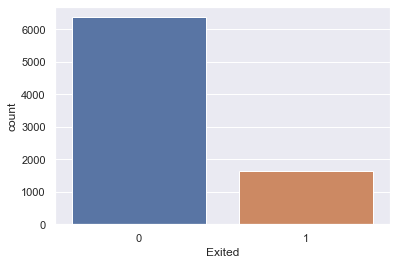

In [86]:
ax = sns.countplot(x="Exited", data=train_df)

In [87]:
new_df = train_df.copy()
churn_df = new_df[new_df["Exited"] == 1]
# not_churn_df = new_df[new_df["Exited"] == 0]

In [88]:
churn_df.groupby("Gender").agg({"Exited": "count"})
# FEMALE --> more exits

,Exited
Gender,
Female,897
Male,733


In [89]:
churn_df.groupby("Geography").agg({"Exited": "count"})
# GERMANY --> more exits

,Exited
Geography,
France,643
Germany,657
Spain,330


In [90]:
churn_df.groupby("NumOfProducts").agg({"Exited": "count"})
# LESS NUMBER OF PRODUCTS --> more exits

,Exited
NumOfProducts,
1,1128
2,278
3,176
4,48


In [60]:
churn_df.groupby("IsActiveMember").agg({"Exited": "count"})
# NON-ACTIVE MEMBERS --> more exits

,Exited
IsActiveMember,
0,1017
1,584


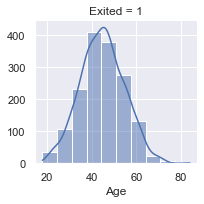

In [67]:
hist = sns.FacetGrid(churn_df, col = "Exited")
hist.map(sns.histplot, "Age", bins = 10, kde = True)
plt.show()

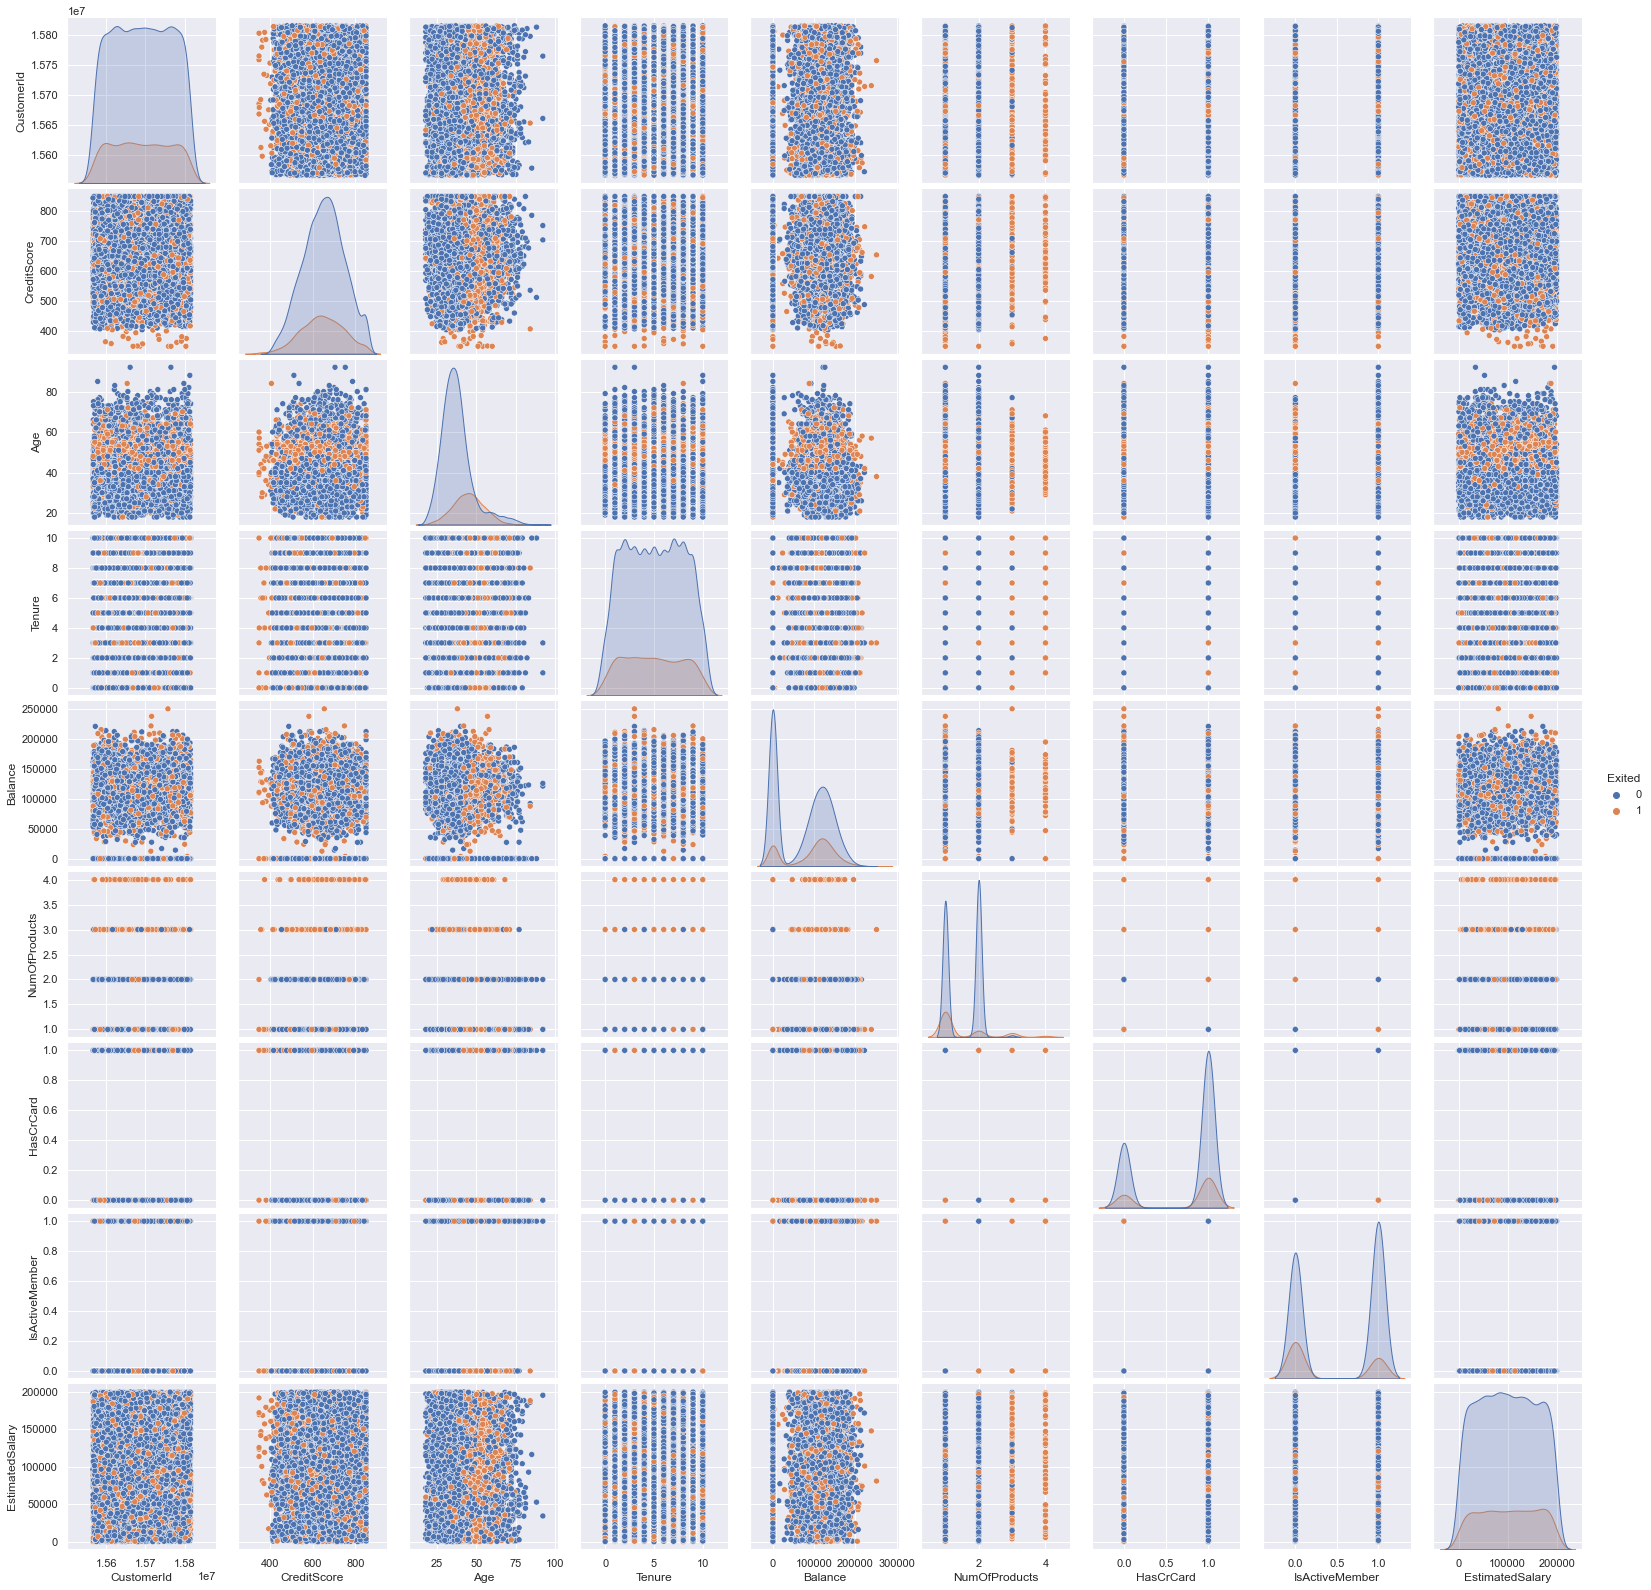

In [11]:
sns.pairplot(train_df, hue = 'Exited')

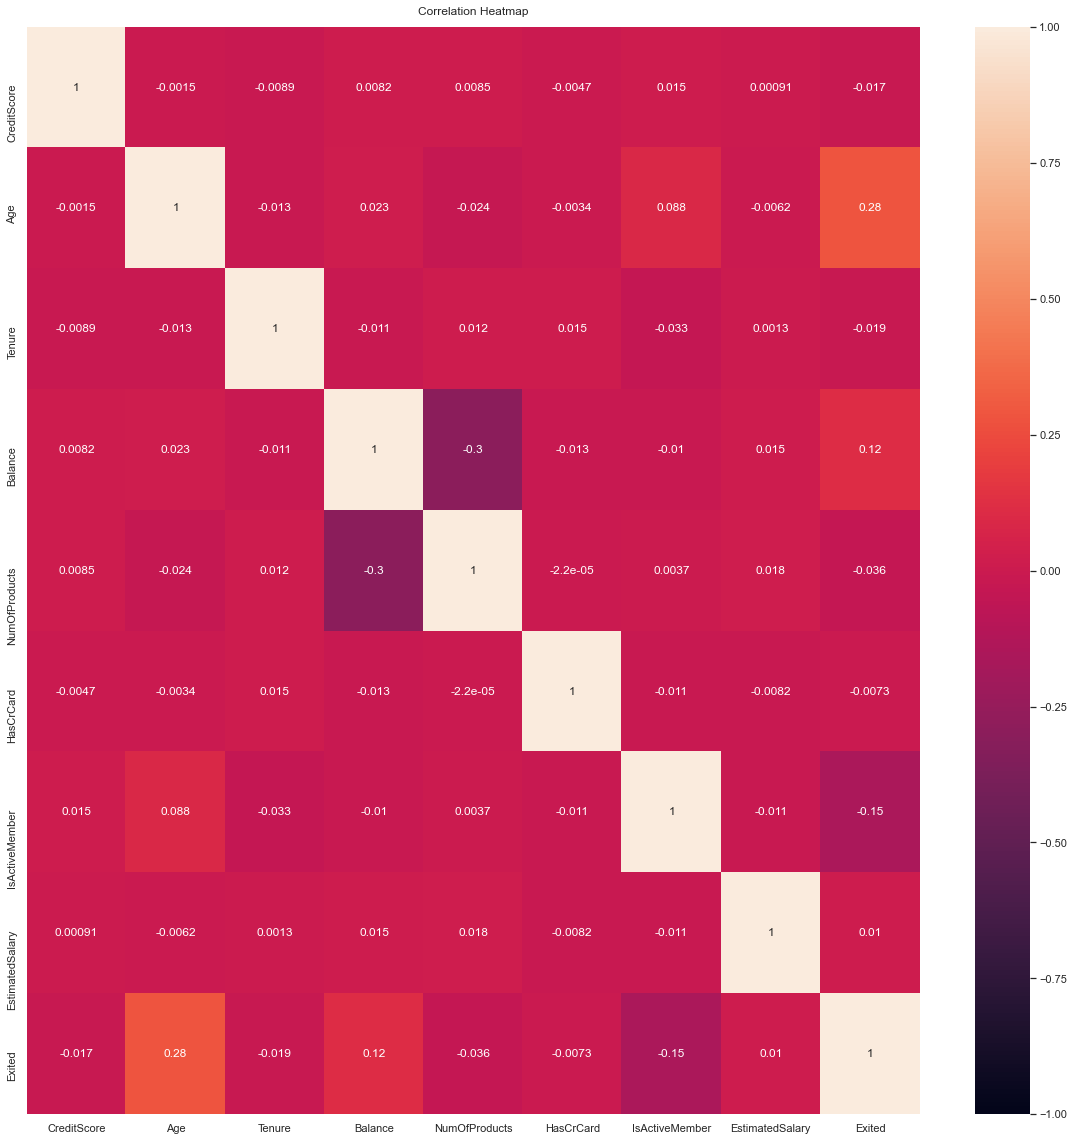

In [64]:
# Increase the size of the heatmap.
plt.figure(figsize=(20, 20))

# Store heatmap object in a variable to easily access it when you want to include more features
# Set the range of values to be displayed on the colormap from -1 to 1,
# Set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
dummy_Geography = pd.get_dummies(df.Geography, drop_first=True)
dummy_Gender = pd.get_dummies(df.Gender, drop_first=True)

In [ ]:
df = pd.concat([df,dummy_Geography,dummy_Gender],axis=1)

In [ ]:
customer_df = df.copy()
customer_df.drop(['CustomerId','Surname','Geography','Gender'],axis=1, inplace=True)
customer_df

In [ ]:
cols = customer_df.columns.tolist()

In [ ]:
cols

In [ ]:
new_df = customer_df
new_df = new_df[['Exited','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
 'EstimatedSalary','Germany','Spain', 'Male']]

In [ ]:
new_df

In [ ]:
new_df.to_csv('Customer_Churn_Cleaned_Data')

In [ ]:
sns.pairplot(new_df, hue = 'Exited')

In [ ]:
import matplotlib.ticker as mtick
churn_rate = df[["Exited", "CustomerId"]]

sectors = churn_rate.groupby("Exited")
churn_rate = pd.DataFrame(sectors["CustomerId"].count())

churn_rate ["Churn Rate"] = (churn_rate ["CustomerId"]/ sum(churn_rate["CustomerId"]))*100

ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,
                                          subplots = False, figsize =(12, 7), fontsize = 15, stacked=False, ylim =(0,100))

plt.ylabel('Proportion of Customers')
plt.xlabel('Exited')
plt.title('Overall Churn Rate of Bank Customers \n')

plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:     
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing
        va = 'bottom'        
        if y_value < 0:           
            space *= -1          
            va = 'top'
        label = "{:.1f}%".format(y_value)    
 
    ax.annotate(label,(x_value, y_value),xytext=(0, space),textcoords="offset points",ha='center',va=va)
    
add_value_labels(ax)
